# Qno.1

In [153]:
#Firstly, we have to import the required libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
from astroML import stats as st

In [155]:
#by using the following function random data can be created from a normaldistribution for the given mean and standard deviation

In [12]:
data = np.random.normal(loc=1.5, scale=0.5, size=1000)

In [157]:
#using the following functions mean, variance, skewness, kurtosis can be calculted

In [13]:
sample_mean = np.mean(data)
sample_var = np.var(data)
skewness = sp.skew(data)
kurtosis = sp.kurtosis(data) +3

In [159]:
#using the following function median absolute deviation MAD can be calculated and the standard deviation can be obtained by multiplying MAD with 1.482

In [14]:
mad = sp.median_abs_deviation(data)
std_dev = mad*1.482

In [1]:
#using the σg calculating standard deviation

In [27]:
std_dev_sigmag = st.sigmaG(data)

In [38]:
output = " Mean : {} \n Variance : {} \n Skewness : {} \n Kurtosis : {} \n MAD : {} \n Standard Deviation using MAD: {} \n Standard Deviation using σg : {}"
output = output.format(sample_mean,sample_var,skewness,kurtosis,mad,std_dev,std_dev_sigmag)

In [162]:
#following function is used to plot the pdf

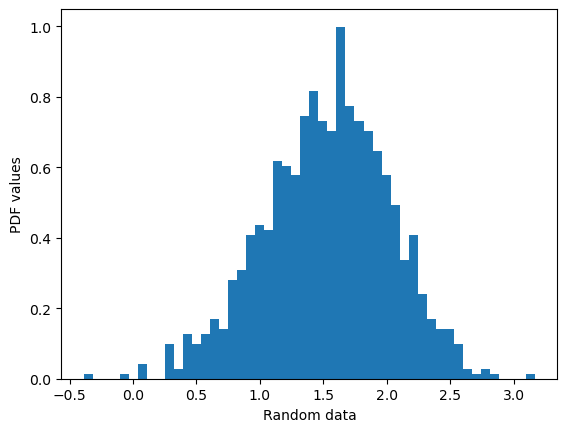

In [29]:
plt.hist(data, bins=50, density=True)
plt.xlabel('Random data')
plt.ylabel('PDF values')
plt.show()

In [164]:
#this line prints the required output

In [39]:
print(output)

 Mean : 1.5278630180316892 
 Variance : 0.243871491860951 
 Skewness : -0.2303973623081665 
 Kurtosis : 3.070085516538266 
 MAD : 0.33815576591951535 
 Standard Deviation using MAD: 0.5011468450927218 
 Standard Deviation using σg : 0.49971975113945255


# Qno.2

In [166]:
#importing the libraries required

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy
from scipy.stats import norm

In [168]:
#generating the x values for the plot

In [169]:
x_val = np.linspace(-15, 15, 1000)

In [170]:
#calculating the cauchy pdf values and gaussian pdf values for the given μ, γ and σ values

In [171]:
cauchy_pdf = cauchy.pdf(x_val, 0, 1.5)
gaussian_pdf = norm.pdf(x_val, 0, 1.5)

In [172]:
#plotting cauchy distribution in default line style and gaussian distribution in '--' line style

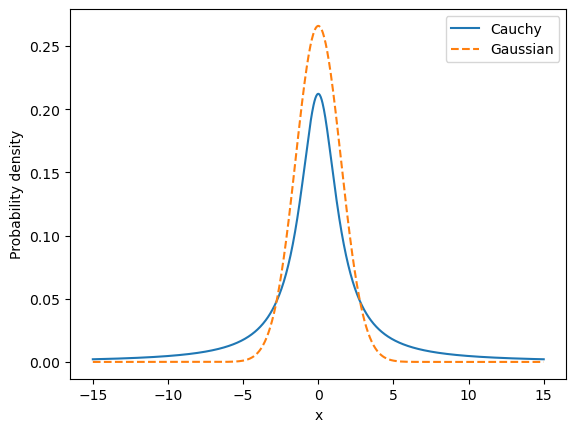

In [173]:
plt.plot(x_val,cauchy_pdf, label='Cauchy')
plt.plot(x_val,gaussian_pdf, label='Gaussian', linestyle='--')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend()
plt.show()

# Qno.3

In [174]:
#importing the libraries required

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm

In [176]:
#generating the x and y values for the plot, should be positive for poisson distribution

In [50]:
x_poisson_vals = np.arange(0, 30)
poisson_pdf = poisson.pmf(x_poisson, 5)
x_gaussian_vals = np.linspace(0, 30, 100)
gaussian_pdf = norm.pdf(x_gaussian, 5, np.sqrt(5))

In [179]:
#plotting poisson distribution in default line style and gaussian distribution in '--' line style

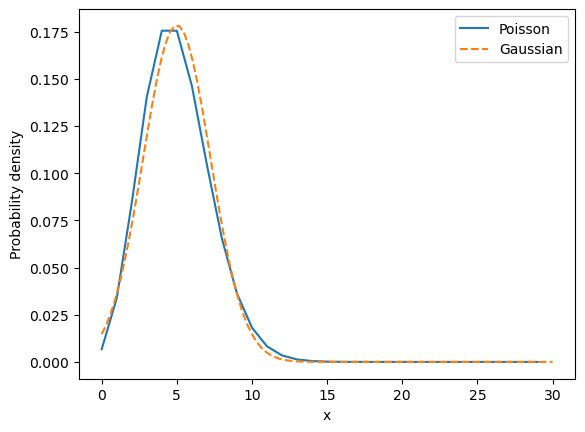

In [51]:
plt.plot(x_poisson_vals,poisson_pdf, label='Poisson')
plt.plot(x_gaussian_vals,gaussian_pdf, label='Gaussian', linestyle='--')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend()
plt.show()

# Qno.4

In [182]:
#importing the libraries required

In [183]:
import numpy as np
from scipy.stats import sem

In [184]:
#storing the given data in numpy arrays

In [185]:
lifetime = np.array([0.8920, 0.881, 0.8913, 0.9837, 0.8958])
uncertainity = np.array([0.00044, 0.009, 0.00032, 0.00048, 0.00045])

In [186]:
# weights of the measurements are the reciprocal of the square of the uncertainties.

In [246]:
weights = 1 / (uncertainity ** 2)

In [188]:
#weighted mean and the uncertainity of mean can be calculated using the following fuctions

In [249]:
weighted_mean = np.average(lifetime, weights=weights)
uncertainty_of_mean = np.sqrt(1/(np.sum(weights)))

In [190]:
#printing the output

In [250]:
print("Weighted mean lifetime: {} +/- {}".format(weighted_mean, uncertainty_of_mean))

Weighted mean lifetime: 0.9089185199574896 +/- 0.00020318737026848627


# Qno.5

In [192]:
#import the data containing the eccentricities of the exoplanets

In [215]:
import csv
import numpy as np
from scipy.stats import boxcox

In [216]:
#define afunction to obtain the eccentricity values from the csv file

In [223]:
def obtain_data(filename):
    a = np.array([])
    with open(filename,mode='r',encoding='utf-8-sig') as eccen:
        data = csv.reader(eccen, delimiter=',')
        next(data)    #this is to skip the header
        for row in data:
            if row[17] == "":
                continue
            elif float(row[17]) == 0.0:
                continue 
            else :
                a=np.append(a,float(row[17]))
        return a

In [224]:
#obtaining the required data from the csv file

In [230]:
eccen_list = obtain_data('eccentricity.csv')

In [231]:
#plot the graph using the following function

In [232]:
import matplotlib.pyplot as plt

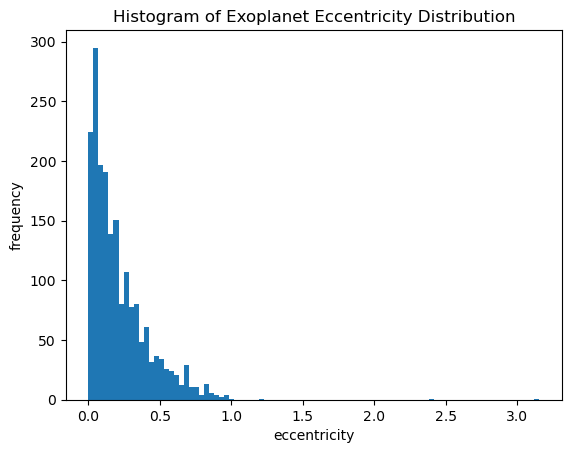

In [239]:
plt.hist(eccen_list, 90)
plt.xlabel('eccentricity')
plt.ylabel('frequency')
plt.title("Histogram of Exoplanet Eccentricity Distribution")
plt.show()

In [226]:
#apllying the box-cox transformation to the eccentricity data obtained

In [236]:
eccen_boxcox= boxcox(eccen_list,lmbda=None)

In [240]:
#plot the graph using the following function after box cox transformation

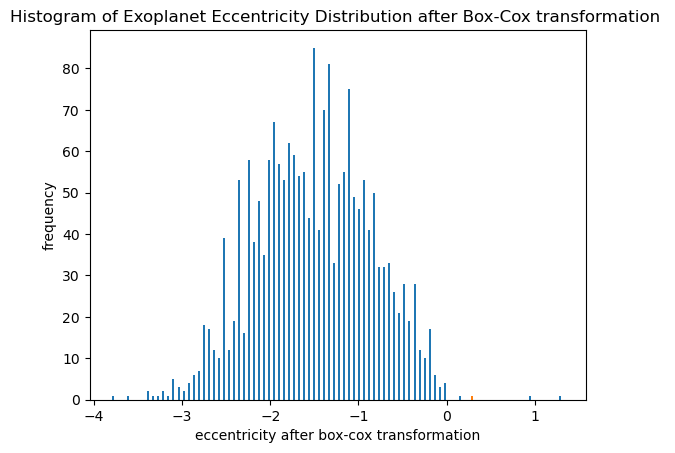

In [238]:
plt.hist(eccen_boxcox, 90)
plt.xlabel('eccentricity after box-cox transformation')
plt.ylabel('frequency')
plt.title("Histogram of Exoplanet Eccentricity Distribution after Box-Cox transformation ")
plt.show()